In [39]:
import requests

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
from datetime import datetime

I use USAJobs API to gather data.

In [132]:
base_url = "https://data.usajobs.gov/api/search"
api_key = "C9XHxoZhqCTTlD2L6sYuYuS3r4FQCvjUP+/7Gt8QrwI="
headers = {
    "Authorization-Key": api_key,
    "User-Agent": "yan.xia@colorado.edu"
}

# Parameters for pagination
results_per_page = 100  
start_record = 1 
max_records = 3000
jobs_data = []

In [133]:
# Loop to gather data with pagination
while start_record <= max_records:
    params = {
        "ResultsPerPage": results_per_page,
        "StartRecord": start_record
    }
    response = requests.get(base_url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        job_listings = data.get('SearchResult', {}).get('SearchResultItems', [])
        
        if not job_listings:
            break
        
        # Normalize and append raw job listings
        df_raw_jobs = pd.json_normalize(job_listings)
        jobs_data.append(df_raw_jobs)
        
        start_record += results_per_page
    else:
        print("Failed to retrieve data. Status code:", response.status_code)
        break

# Concatenate all collected pages into a single DataFrame
df_raw_jobs = pd.concat(jobs_data, ignore_index=True)

After I got the raw data, I need to take a look at the shape.

In [134]:
df_raw_jobs.shape

(3000, 70)

In [135]:
print("Raw dataset columns:")
print(df_raw_jobs.columns)

Raw dataset columns:
Index(['MatchedObjectId', 'RelevanceRank',
       'MatchedObjectDescriptor.PositionID',
       'MatchedObjectDescriptor.PositionTitle',
       'MatchedObjectDescriptor.PositionURI',
       'MatchedObjectDescriptor.ApplyURI',
       'MatchedObjectDescriptor.PositionLocationDisplay',
       'MatchedObjectDescriptor.PositionLocation',
       'MatchedObjectDescriptor.OrganizationName',
       'MatchedObjectDescriptor.DepartmentName',
       'MatchedObjectDescriptor.JobCategory',
       'MatchedObjectDescriptor.JobGrade',
       'MatchedObjectDescriptor.PositionSchedule',
       'MatchedObjectDescriptor.PositionOfferingType',
       'MatchedObjectDescriptor.QualificationSummary',
       'MatchedObjectDescriptor.PositionRemuneration',
       'MatchedObjectDescriptor.PositionStartDate',
       'MatchedObjectDescriptor.PositionEndDate',
       'MatchedObjectDescriptor.PublicationStartDate',
       'MatchedObjectDescriptor.ApplicationCloseDate',
       'MatchedObjectDescrip

In [136]:
print(df_raw_jobs.head())

  MatchedObjectId  RelevanceRank MatchedObjectDescriptor.PositionID  \
0       451842500              0                            OARMAV1   
1       534684000              0                 DE-10497103-24-JDA   
2       536458000              0                  DE-10526502-19-DF   
3       539602100              0                 DE-10552931-19-SEA   
4       547366900              0              AGL-ERR-20-2101-63651   

               MatchedObjectDescriptor.PositionTitle  \
0      Attorney and Assistant United States Attorney   
1                                          ARCHITECT   
2                                           Attorney   
3                                          ARCHITECT   
4  Technical Operations (AJW) Airway Transportati...   

                 MatchedObjectDescriptor.PositionURI  \
0  https://www.usajobs.gov:443/GetJob/ViewDetails...   
1  https://www.usajobs.gov:443/GetJob/ViewDetails...   
2  https://www.usajobs.gov:443/GetJob/ViewDetails...   
3  https://w

In [137]:
print(df_raw_jobs.columns)

Index(['MatchedObjectId', 'RelevanceRank',
       'MatchedObjectDescriptor.PositionID',
       'MatchedObjectDescriptor.PositionTitle',
       'MatchedObjectDescriptor.PositionURI',
       'MatchedObjectDescriptor.ApplyURI',
       'MatchedObjectDescriptor.PositionLocationDisplay',
       'MatchedObjectDescriptor.PositionLocation',
       'MatchedObjectDescriptor.OrganizationName',
       'MatchedObjectDescriptor.DepartmentName',
       'MatchedObjectDescriptor.JobCategory',
       'MatchedObjectDescriptor.JobGrade',
       'MatchedObjectDescriptor.PositionSchedule',
       'MatchedObjectDescriptor.PositionOfferingType',
       'MatchedObjectDescriptor.QualificationSummary',
       'MatchedObjectDescriptor.PositionRemuneration',
       'MatchedObjectDescriptor.PositionStartDate',
       'MatchedObjectDescriptor.PositionEndDate',
       'MatchedObjectDescriptor.PublicationStartDate',
       'MatchedObjectDescriptor.ApplicationCloseDate',
       'MatchedObjectDescriptor.PositionFormatted

In [138]:
print("Raw dataset sample:")
print(df_raw_jobs.head())

Raw dataset sample:
  MatchedObjectId  RelevanceRank MatchedObjectDescriptor.PositionID  \
0       451842500              0                            OARMAV1   
1       534684000              0                 DE-10497103-24-JDA   
2       536458000              0                  DE-10526502-19-DF   
3       539602100              0                 DE-10552931-19-SEA   
4       547366900              0              AGL-ERR-20-2101-63651   

               MatchedObjectDescriptor.PositionTitle  \
0      Attorney and Assistant United States Attorney   
1                                          ARCHITECT   
2                                           Attorney   
3                                          ARCHITECT   
4  Technical Operations (AJW) Airway Transportati...   

                 MatchedObjectDescriptor.PositionURI  \
0  https://www.usajobs.gov:443/GetJob/ViewDetails...   
1  https://www.usajobs.gov:443/GetJob/ViewDetails...   
2  https://www.usajobs.gov:443/GetJob/ViewDetail

These are the columns I am interested in and useful for my research topic.

In [139]:
selected_columns = [
    'MatchedObjectDescriptor.PositionRemuneration',
    'MatchedObjectDescriptor.PositionLocation',
    'MatchedObjectDescriptor.JobCategory',
    'MatchedObjectDescriptor.PublicationStartDate',
    'MatchedObjectDescriptor.ApplicationCloseDate',
    'MatchedObjectDescriptor.UserArea.Details.JobSummary'
]

df_selected = df_raw_jobs[selected_columns]

# Display the selected columns
print("Selected dataset columns:")
print(df_selected.head())

Selected dataset columns:
        MatchedObjectDescriptor.PositionRemuneration  \
0  [{'MinimumRange': '59319.0', 'MaximumRange': '...   
1  [{'MinimumRange': '120246.0', 'MaximumRange': ...   
2  [{'MinimumRange': '64649.0', 'MaximumRange': '...   
3  [{'MinimumRange': '86962.0', 'MaximumRange': '...   
4  [{'MinimumRange': '38560.0', 'MaximumRange': '...   

            MatchedObjectDescriptor.PositionLocation  \
0  [{'LocationName': 'Washington, District of Col...   
1  [{'LocationName': 'China Lake, California', 'C...   
2  [{'LocationName': 'Salt Lake City, Utah', 'Cou...   
3  [{'LocationName': 'Camp Lejeune, North Carolin...   
4  [{'LocationName': 'Saint Croix, Virgin Islands...   

                 MatchedObjectDescriptor.JobCategory  \
0             [{'Name': 'Attorney', 'Code': '0905'}]   
1         [{'Name': 'Architecture', 'Code': '0808'}]   
2             [{'Name': 'Attorney', 'Code': '0905'}]   
3         [{'Name': 'Architecture', 'Code': '0808'}]   
4  [{'Name': 'Transp

I remove some irrelevent columns and then use keywords to get the job list of disabilities, create a vacancy duration column and salary min and max columns by calculating. Finally, I got the cleaned dataset.

In [140]:
jobs_data = []

for _, row in df_selected.iterrows():
    job_info = row['MatchedObjectDescriptor.UserArea.Details.JobSummary']
    
    # Check for mentions of disabilities in the job summary
    disability_keywords = ['disability', 'accommodation', 'accessible', 'equal opportunity', 'reasonable accommodation']
    disability_mention = any(keyword in str(job_info).lower() for keyword in disability_keywords)
    
    # Extract salary information
    remuneration_info = row['MatchedObjectDescriptor.PositionRemuneration']
    if isinstance(remuneration_info, list) and len(remuneration_info) > 0:
        salary_min = remuneration_info[0].get('MinimumRange', None)
        salary_max = remuneration_info[0].get('MaximumRange', None)
    else:
        salary_min = None
        salary_max = None

    # Extract dates
    date_posted = row['MatchedObjectDescriptor.PublicationStartDate']
    closing_date = row['MatchedObjectDescriptor.ApplicationCloseDate']
    
    # Calculate vacancy duration in days
    if date_posted and closing_date:
        date_posted_dt = datetime.strptime(date_posted, '%Y-%m-%dT%H:%M:%S.%f')
        closing_date_dt = datetime.strptime(closing_date, '%Y-%m-%dT%H:%M:%S.%f')
        vacancy_duration = (closing_date_dt - date_posted_dt).days
    else:
        vacancy_duration = None  # Handle cases where dates are missing
    
    jobs_data.append({
        'SalaryMin': salary_min,
        'SalaryMax': salary_max,
        'Location': row['MatchedObjectDescriptor.PositionLocation'][0]['LocationName'] if isinstance(row['MatchedObjectDescriptor.PositionLocation'], list) else None,
        'JobCategory': row['MatchedObjectDescriptor.JobCategory'][0]['Name'] if isinstance(row['MatchedObjectDescriptor.JobCategory'], list) else None,
        'DatePosted': date_posted,
        'ClosingDate': closing_date,
        'VacancyDuration': vacancy_duration,
        'DisabilityMention': disability_mention
    })

# Convert the list of dictionaries to a DataFrame
df_jobs = pd.DataFrame(jobs_data)

# Convert DatePosted and ClosingDate to datetime for outlier detection
df_jobs['DatePosted'] = pd.to_datetime(df_jobs['DatePosted'])
df_jobs['ClosingDate'] = pd.to_datetime(df_jobs['ClosingDate'])
df_jobs['SalaryMin'] = pd.to_numeric(df_jobs['SalaryMin'], errors='coerce')
df_jobs['SalaryMax'] = pd.to_numeric(df_jobs['SalaryMax'], errors='coerce')

# Display the final dataset with the new columns
print("Final dataset with additional columns:")
print(df_jobs.head())


Final dataset with additional columns:
   SalaryMin  SalaryMax                          Location  \
0    59319.0   152771.0  Washington, District of Columbia   
1   120246.0   156323.0            China Lake, California   
2    64649.0   172500.0              Salt Lake City, Utah   
3    86962.0   113047.0      Camp Lejeune, North Carolina   
4    38560.0   123652.0       Saint Croix, Virgin Islands   

                 JobCategory              DatePosted             ClosingDate  \
0                   Attorney 2023-11-28 00:00:00.000 2024-11-27 23:59:59.997   
1               Architecture 2024-03-12 00:00:00.000 2024-12-31 23:59:59.997   
2                   Attorney 2024-05-14 15:27:05.560 2025-05-13 23:59:59.997   
3               Architecture 2024-09-12 00:00:00.000 2024-10-06 23:59:59.997   
4  Transportation Specialist 2024-08-18 00:00:00.000 2025-08-17 23:59:59.997   

   VacancyDuration  DisabilityMention  
0              365              False  
1              294              F

In [141]:
# Find and display all rows with missing values
rows_with_missing_values = df_jobs[df_jobs.isnull().any(axis=1)]
print(rows_with_missing_values)

Empty DataFrame
Columns: [SalaryMin, SalaryMax, Location, JobCategory, DatePosted, ClosingDate, VacancyDuration, DisabilityMention]
Index: []


{'SalaryMinOutliers': 1       120246.0
 26      120246.0
 32      110000.0
 51      152532.0
 86      122083.0
           ...   
 2951    152532.0
 2986    122083.0
 2987    122083.0
 2994    145000.0
 2995    145000.0
 Name: SalaryMin, Length: 240, dtype: float64,
 'SalaryMaxOutliers': 94      320000.0
 95      320000.0
 194     320000.0
 195     320000.0
 294     320000.0
 295     320000.0
 394     320000.0
 395     320000.0
 494     320000.0
 495     320000.0
 594     320000.0
 595     320000.0
 694     320000.0
 695     320000.0
 794     320000.0
 795     320000.0
 894     320000.0
 895     320000.0
 994     320000.0
 995     320000.0
 1094    320000.0
 1095    320000.0
 1194    320000.0
 1195    320000.0
 1294    320000.0
 1295    320000.0
 1394    320000.0
 1395    320000.0
 1494    320000.0
 1495    320000.0
 1594    320000.0
 1595    320000.0
 1694    320000.0
 1695    320000.0
 1794    320000.0
 1795    320000.0
 1894    320000.0
 1895    320000.0
 1994    320000.0
 1995    32

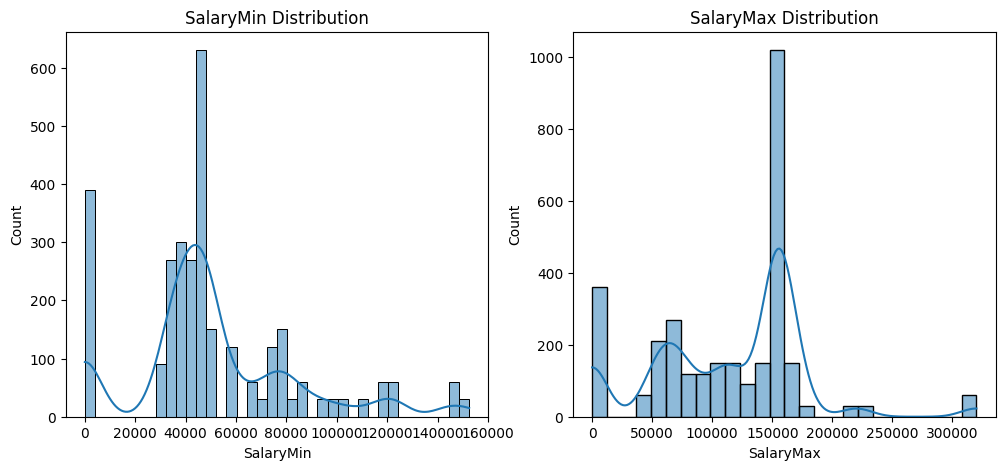

In [142]:

def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Detect outliers in SalaryMin and SalaryMax
salary_min_outliers = detect_outliers(df_jobs['SalaryMin'])
salary_max_outliers = detect_outliers(df_jobs['SalaryMax'])



# Visualizations of distributions
plt.figure(figsize=(12, 5))

# SalaryMin distribution
plt.subplot(1, 2, 1)
sns.histplot(df_jobs['SalaryMin'], kde=True)
plt.title('SalaryMin Distribution')

# SalaryMax distribution
plt.subplot(1, 2, 2)
sns.histplot(df_jobs['SalaryMax'], kde=True)
plt.title('SalaryMax Distribution')


# Display outliers
{
    'SalaryMinOutliers': salary_min_outliers,
    'SalaryMaxOutliers': salary_max_outliers
}


Since the dataset contains the rows that Salary min or max close to 0, I think that's because these data contains the salary per hour or week. I need to remove them. (Because of the lowest salary law, I set the salary min and shoule be bigger than 2000)

In [143]:
df_jobs['SalaryMin'] = pd.to_numeric(df_jobs['SalaryMin'], errors='coerce')
df_jobs['SalaryMax'] = pd.to_numeric(df_jobs['SalaryMax'], errors='coerce')

df_jobs_cleaned= df_jobs.dropna()
df_jobs_cleaned = df_jobs_cleaned[(df_jobs_cleaned['SalaryMin'] > 2000) & (df_jobs_cleaned['SalaryMax'] > 2000)]

In [144]:
df_jobs_cleaned.shape

(2610, 8)

Text(0.5, 1.0, 'SalaryMax Distribution (No Outliers)')

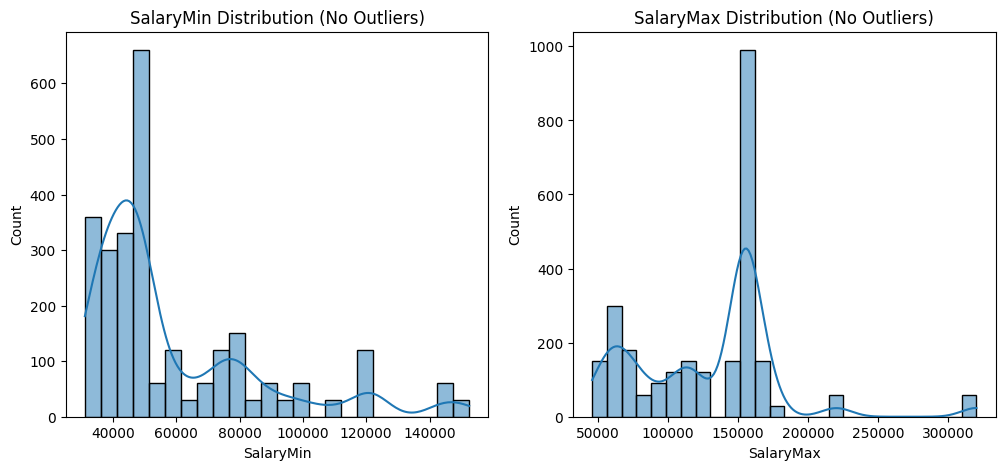

In [145]:
plt.figure(figsize=(12, 5))

# SalaryMin distribution
plt.subplot(1, 2, 1)
sns.histplot(df_jobs_cleaned['SalaryMin'], kde=True)
plt.title('SalaryMin Distribution (No Outliers)')

# SalaryMax distribution
plt.subplot(1, 2, 2)
sns.histplot(df_jobs_cleaned['SalaryMax'], kde=True)
plt.title('SalaryMax Distribution (No Outliers)')


In [147]:
print(df_jobs_cleaned.sample(5))


      SalaryMin  SalaryMax                Location  \
1296    74357.0    88298.0       El Reno, Oklahoma   
236     47813.0   155403.0        Belgium, Belgium   
366     35373.0    57354.0  Sisseton, South Dakota   
1145    38503.0   146757.0        Belgium, Belgium   
2876    78255.0   108995.0           Salem, Oregon   

                              JobCategory              DatePosted  \
1296                       Dental Hygiene 2023-11-28 00:00:00.000   
236                Mechanical Engineering 2023-09-30 00:00:00.000   
366            Medical Records Technician 2024-07-01 14:56:12.273   
1145  Environmental Protection Specialist 2023-10-04 00:00:00.000   
2876                           Psychology 2024-07-02 00:00:00.000   

                 ClosingDate  VacancyDuration  DisabilityMention  
1296 2024-09-30 23:59:59.997              307              False  
236  2024-09-30 23:59:59.997              366              False  
366  2024-12-07 23:59:59.997              159              

Text(0.5, 1.0, 'Boxplot of SalaryMin')

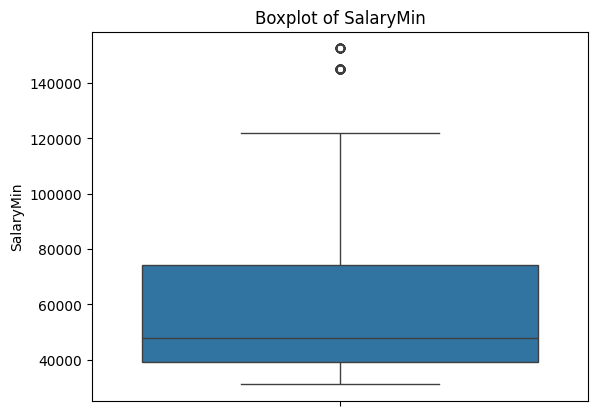

In [154]:
sns.boxplot(data=df_jobs_cleaned['SalaryMin'])
plt.title('Boxplot of SalaryMin')

Text(0.5, 1.0, 'Boxplot of SalaryMax')

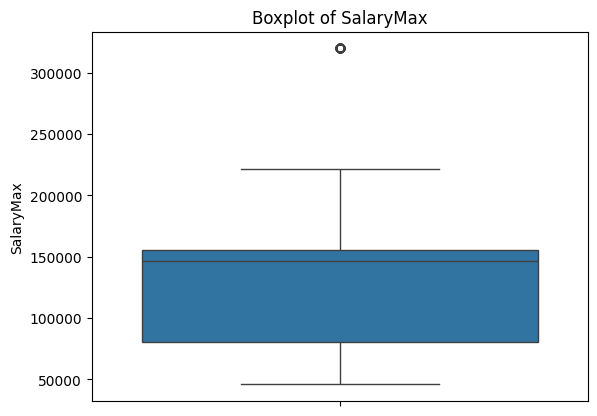

In [155]:
sns.boxplot(data=df_jobs_cleaned['SalaryMax'])
plt.title('Boxplot of SalaryMax')

Text(0.5, 1.0, 'Distribution of Vacancy Duration')

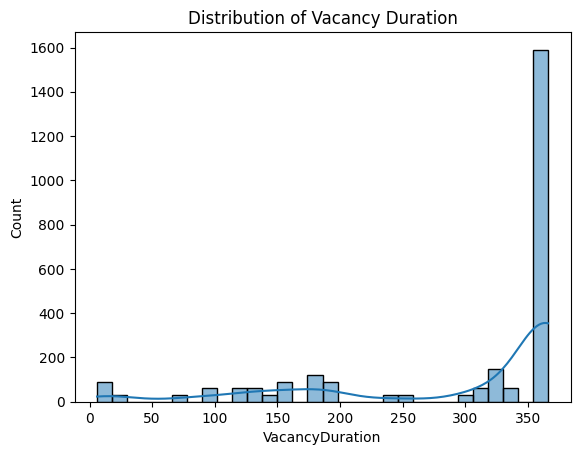

In [149]:
sns.histplot(df_jobs_cleaned['VacancyDuration'], kde=True, bins=30)
plt.title('Distribution of Vacancy Duration')


Text(0.5, 1.0, 'Boxplot of Vacancy Duration')

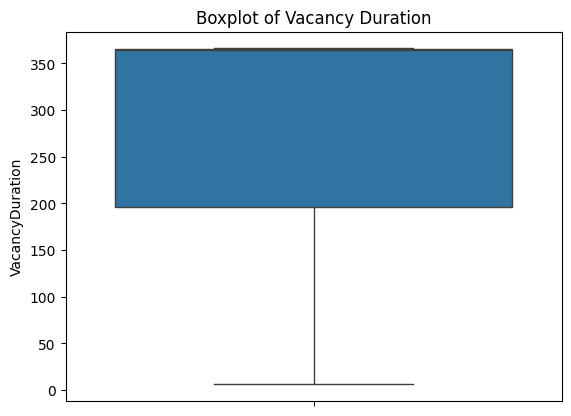

In [156]:
sns.boxplot(data=df_jobs_cleaned['VacancyDuration'])
plt.title('Boxplot of Vacancy Duration')

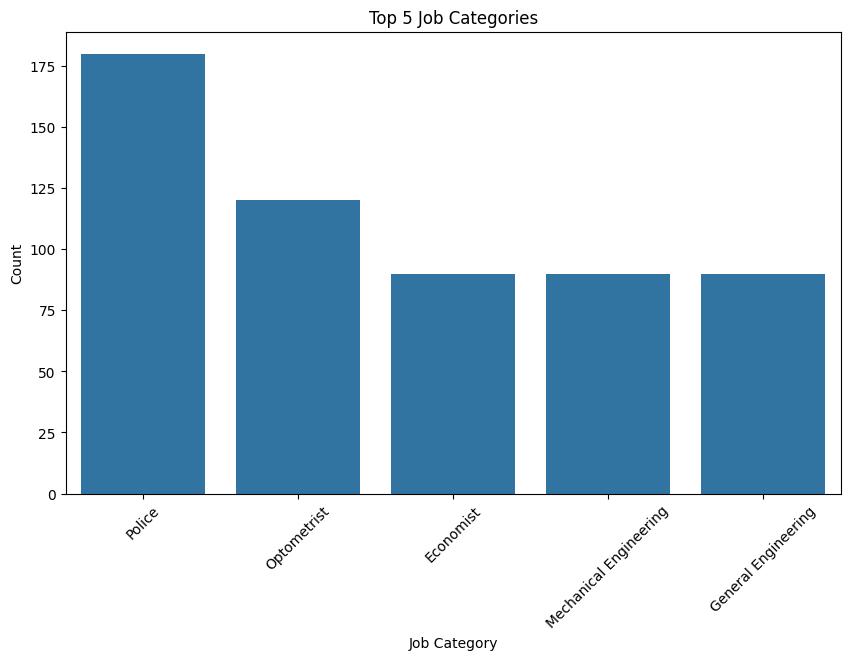

In [152]:
plt.figure(figsize=(10, 6))
top_5_categories = df_jobs_cleaned['JobCategory'].value_counts().nlargest(5)
sns.barplot(x=top_5_categories.index, y=top_5_categories.values)
plt.xticks(rotation=45)
plt.title('Top 5 Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.show()